In [1]:
import cv2
from bovw import BOVW
import pandas
from typing import *
from PIL import Image
import matplotlib.pyplot as plt 
from main import Dataset, run_final_pipeline, run_BOVW_experiment
from IPython.display import clear_output

/home/msiau/anaconda3/envs/C3_Team1/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the data

In [2]:
print("Loading Train Dataset...")
data_train = Dataset(ImageFolder="../places_reduced/train")

print("Loading Test Dataset...")
data_test = Dataset(ImageFolder="../places_reduced/val")

Loading Train Dataset...
{'shopping and dining': 0, 'sports and leisure': 1, 'water_ice_snow': 2, 'mountains_hills_desert_sky': 3, 'workplace': 4, 'home or hotel': 5, 'forest_field_jungle': 6, 'industrial and construction': 7, 'houses_cabins_gardens_farms': 8, 'commercial buildings': 9, 'sports_fields': 10}
Loading Test Dataset...
{'shopping and dining': 0, 'sports and leisure': 1, 'water_ice_snow': 2, 'mountains_hills_desert_sky': 3, 'workplace': 4, 'home or hotel': 5, 'forest_field_jungle': 6, 'industrial and construction': 7, 'houses_cabins_gardens_farms': 8, 'commercial buildings': 9, 'sports_fields': 10}


In [ ]:
bovw = BOVW(detector_type="DENSE_SIFT", codebook_size=100_000, method="l2")
run_BOVW_experiment(bovw,data_train,data_test,)


Detector is DENSE_SIFT. Skipping cache to ensure correct parameters...


Phase [Extracting Dense Features]: 100%|██████████| 8700/8700 [00:43<00:00, 201.53it/s]


Fitting final codebook (k=100000)...


/home/msiau/anaconda3/envs/C3_Team1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


#### Run the entire suit of tests and save them to final_experiment_results.csv

In [ ]:
# run_final_pipeline(data_train, data_test) # Uncomment for delivery

#### Loading the results csv from previous executions

In [12]:
results = pandas.read_csv("final_experiment_results.csv")

#### Results of the first experiment

In [14]:
print(results[results["Experiment"] == "Classifiers"])

    Experiment Parameter       Value  ... CV_Accuracy    CV_Std  Test_Accuracy
0  Classifiers      Type     log_reg  ...    0.284545  0.022446       0.303182
1  Classifiers      Type  svm_linear  ...    0.271095  0.011908       0.291818
2  Classifiers      Type     svm_rbf  ...    0.301675  0.017618       0.340000
3  Classifiers      Type          rf  ...    0.247870  0.013414       0.272727

[4 rows x 8 columns]


#### Running a given experiment and keeping the labels for qualitative results

In [18]:
classifiers = ["log_reg", "svm_linear", "svm_rbf", "rf"]
experiment_one_acc = {}
experiment_one_data = {}

for clf in classifiers:
    print("Running classifier", clf)
    bovw = BOVW(detector_type="SIFT", codebook_size=128)
    experiment_one_acc[clf], experiment_one_data[clf] = run_BOVW_experiment(bovw,data_train,data_test, clf_name=clf)

clear_output()
print("Experiment 1 succesfull")

Experiment 1 succesfull


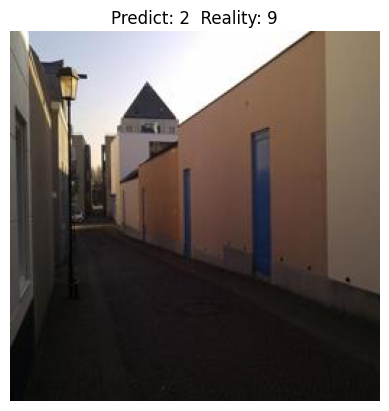

In [19]:
plt.title(f"Predict: {experiment_one_data[clf][0][0]}  Reality: {experiment_one_data[clf][0][1]}")
plt.imshow(data_test[0][0])
plt.axis("off")  # Hide axes for a cleaner look
plt.show()

In [1]:
classifiers = ["log_reg", "svm_linear", "svm_rbf", "rf"]
experiment_one_acc = {}
experiment_one_data = {}

for clf in classifiers:
    print("Running classifier", clf)
    bovw = BOVW(detector_type="SIFT", codebook_size=128)
    experiment_one_acc[clf], experiment_one_data[clf] = run_BOVW_experiment(bovw,data_train,data_test, clf_name=clf)

clear_output()
print("Experiment 1 succesfull")

Running classifier log_reg


NameError: name 'BOVW' is not defined

In [ ]:
import cv2
from bovw import BOVW
import pandas
from typing import *
from PIL import Image
import matplotlib.pyplot as plt 
from main import Dataset, run_final_pipeline, run_BOVW_experiment
from IPython.display import clear_output

print("Loading Train Dataset...")
data_train = Dataset(ImageFolder="../places_reduced/train")

print("Loading Test Dataset...")
data_test = Dataset(ImageFolder="../places_reduced/val")

/home/msiau/anaconda3/envs/C3_Team1/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading Train Dataset...
{'forest_field_jungle': 0, 'commercial buildings': 1}
Loading Test Dataset...
{'shopping and dining': 0, 'sports and leisure': 1, 'water_ice_snow': 2, 'mountains_hills_desert_sky': 3, 'workplace': 4, 'home or hotel': 5, 'forest_field_jungle': 6, 'industrial and construction': 7, 'houses_cabins_gardens_farms': 8, 'commercial buildings': 9, 'sports_fields': 10}


In [ ]:
# Original 

""" bovw = BOVW()
og_acc, og_data = run_BOVW_experiment(bovw,data_train,data_test,)

# Our Baseline
bovw = BOVW(detector_type="SIFT", codebook_size=128)
baselina_acc, baselina_data = run_BOVW_experiment(bovw,data_train,data_test, clf_name="svm_linear")
 """

# Final Baseline
from fisher_vector import final_mod

final_acc2, final_data2 = final_mod(data_train,data_test)

Gathering descriptors from training set (this may take a while)...


Extracting descriptors: 100%|██████████| 42/42 [00:00<00:00, 138.21it/s]


Total train images with descriptors: 42
Sample descriptors shape (for GMM): (43008, 128)
(43008, 128)
y
Fitting GMM with K=128, cov_type=diag on 43008 descriptors...
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
Initialization converged: True


Computing Fisher Vectors (Parallel): 100%|██████████| 42/42 [00:00<00:00, 670.82it/s]


Extracting descriptors for test set...


Computing Fisher Vectors (Parallel): 100%|██████████| 2200/2200 [00:09<00:00, 227.84it/s]


Cross-validating on training FVs (5-fold)...
(42, 32768)
CV accuracy: 0.6667 ± 0.0456
